In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [623]:
img = cv2.imread("./dataset/10 ชาติชาย raptor pre op LDFA MPTA  Drawing4.jpg")
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

height, width = imgGray.shape

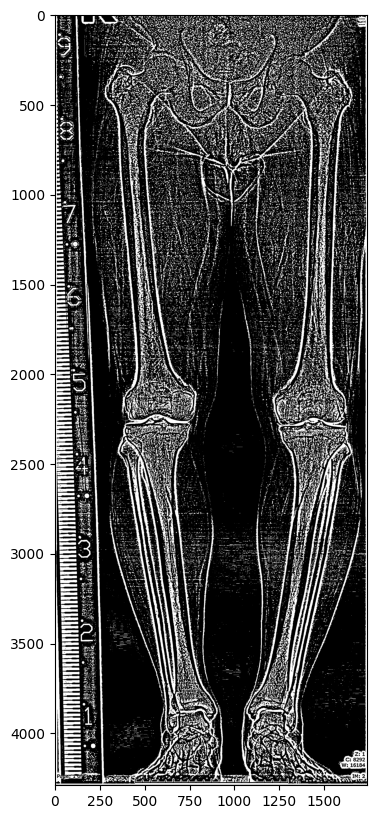

In [624]:
# th3 = cv2.adaptiveThreshold(imgGray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,31,2)
th3 = cv2.adaptiveThreshold(imgGray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,31,2)
plt.figure(figsize=(10,10))
plt.imshow(th3,cmap="gray")

In [625]:
# sigma = 2
# k = 2
# s1 = cv2.GaussianBlur(th3, ksize=(0,0), sigmaX=k*sigma)
# s2 = cv2.GaussianBlur(th3, ksize=(0,0), 
#                       sigmaX=sigma
#                       )
# imgGray = cv2.subtract(s2, s1)

# # imgGrayEdge = cv2.Canny(th3, 0, 25, 25)

# plt.figure(figsize=(10,10))
# plt.imshow(imgGray, cmap="gray")

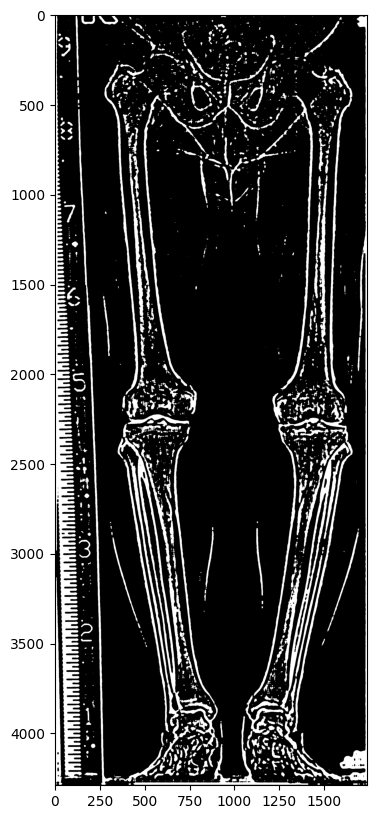

In [626]:
imgGrayBlur = cv2.medianBlur(th3,15)

plt.figure(figsize=(10,10))
plt.imshow(imgGrayBlur, cmap="gray")

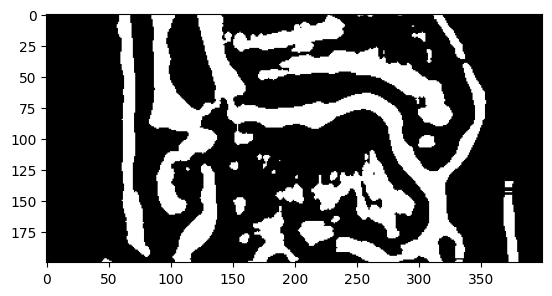

In [628]:
knee = imgGrayBlur[3800:4000,550:950]
plt.imshow(knee, cmap='gray')

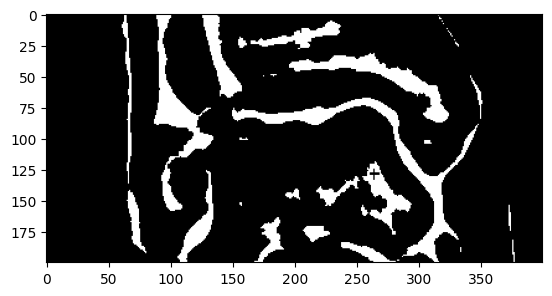

In [629]:
# kernel = np.ones((5,5),np.uint8)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(8,8))
knee_erosion = cv2.erode(knee,kernel,iterations = 1)
plt.imshow(knee_erosion, cmap='gray')

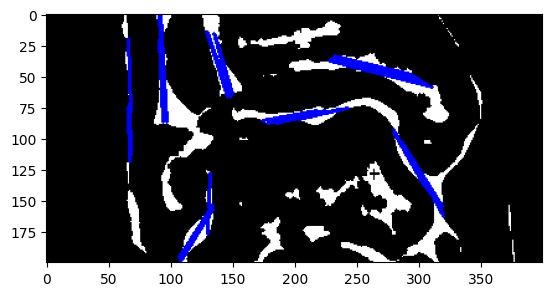

In [630]:
kneeRGB = cv2.cvtColor(knee_erosion, cv2.COLOR_GRAY2RGB)
lines = cv2.HoughLinesP(knee_erosion, 1, np.pi/180, threshold=50, minLineLength=40, maxLineGap=1)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(kneeRGB, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(kneeRGB, cmap="gray")

In [631]:
a = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    if( x2 == x1):
        continue
    slope = (y2 - y1) / (x2 - x1)
    if(abs(slope) < 0.25):
        a.append(line)

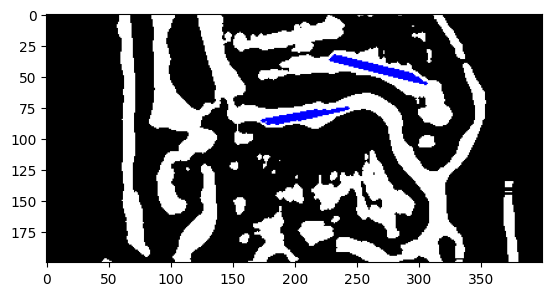

In [632]:
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
for line in a:
    x1, y1, x2, y2 = line[0]
    cv2.line(kneeRGB, (x1, y1), (x2, y2), (0, 0, 255), 2)
plt.imshow(kneeRGB, cmap="gray")

In [633]:
def select_longest_line(line):
    select_line = line[0][0]
    for i in line:
        x1, y1, x2, y2 = select_line
        x3, y3, x4, y4 = i[0]
        if(math.dist([x3,y3],[x4,y4]) > math.dist([x1,y1],[x2,y2])):
            select_line = i[0]
    return select_line

In [634]:
# select_line = a[0][0]
# for i in a:
#     if(i[0][1] > select_line[1]):
#         select_line = i[0]

In [635]:
select_line = select_longest_line(a)

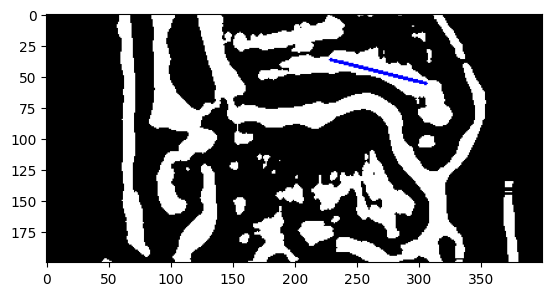

In [636]:
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
x1, y1, x2, y2 = select_line
cv2.line(kneeRGB, (x1, y1), (x2, y2), (0, 0, 255), 2)
plt.imshow(kneeRGB, cmap="gray")

In [620]:
def midpoint(p1, p2):
    return (p1+p2)/2  

[124.5  66. ]


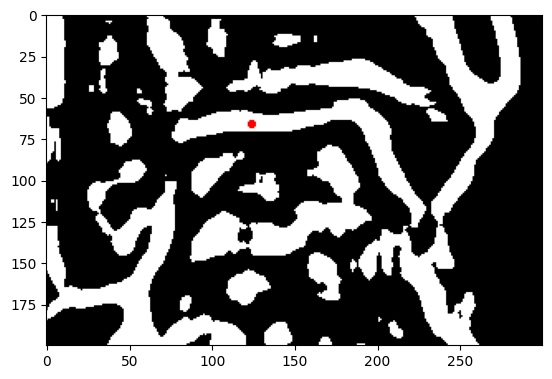

In [622]:
x1, y1, x2, y2 = select_line
m = midpoint(np.array([x1,y1]), np.array([x2,y2]))
print(m)
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
image = cv2.circle(kneeRGB, (int(m[0]), int(m[1])), 1, [255,0,0], 2)
plt.imshow(image)

threshold

In [ ]:
gray_img = 255 - imgGray
gray_img[gray_img > 180] = 255
gray_img[gray_img <= 180] = 0
gray_img = gray_img
plt.figure(figsize=(10,10))
plt.imshow(gray_img, cmap="gray")

In [ ]:
edges = cv2.Canny(gray_img, 100, 200)

plt.figure(figsize=(20,20))
plt.imshow(edges, cmap="gray")

In [ ]:
kernel = np.ones((10, 10), np.uint8)
closing = cv2.morphologyEx(gray_img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10,10))
plt.imshow(closing, cmap="gray")

In [ ]:
edges = cv2.Canny(closing, 100, 200)

plt.figure(figsize=(20,20))
plt.imshow(edges, cmap="gray")

In [ ]:
knee = edges[3900:4100,450:750]
plt.imshow(knee, cmap='gray')

In [ ]:
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
lines = cv2.HoughLinesP(knee, 2, np.pi/180, threshold=50, minLineLength=50, maxLineGap=20)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(kneeRGB, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(kneeRGB, cmap="gray")

In [ ]:
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
dst = cv2.cornerHarris(knee,2,31,0.23)
print(kneeRGB.shape)
dst = cv2.dilate(dst,None)
print(dst.shape)

kneeRGB[dst>0.02*dst.max()]=[255,0,0]

plt.imshow(kneeRGB)